In [12]:
import pandas as pd
import missingno as msno
import seaborn as sns
import datetime, time
import os
path = os.getcwd()
os.makedirs(path + "/DatosLimpiosYOutliers", exist_ok=True)

def fechadatetime(df):
    fechahoras = []
    fechas=[]
    for _,row in df.iterrows():
        fecha = str(int(row.DIA))+"/"+\
                str(int(row.MES))+"/"+\
                str(int(row.ANO))
        fechahora = fecha+"-"+str(int(row.HORA-1)) # para que sea de 0 a 23
        #print(fechahora)
        fechahoras.append(datetime.datetime.strptime(fechahora,"%d/%m/%Y-%H"))
        fechas.append(fecha)
    df['FECHAH'] = fechahoras
    df['FECHA'] = fechas
    df['FECHA'] = pd.to_datetime(df['FECHA'])
    return df

In [13]:
#Leemos el fichero de github.
fichero = "https://raw.githubusercontent.com/albercol/TFG/main/Fase%202/DatosLimpios/Meteorologia.csv"
df =  pd.read_csv(fichero)
magnitudes = ["VELOCIDAD VIENTO","DIR. VIENTO","TEMPERATURA","HUMEDAD RELATIVA","PRESION BAROMETRICA","PRECIPITACIONES"]
df = fechadatetime(df)
df

,DIA,MES,ANO,HORA,VELOCIDAD VIENTO,DIR. VIENTO,TEMPERATURA,HUMEDAD RELATIVA,PRESION BAROMETRICA,PRECIPITACIONES,FECHAH,FECHA
0,1,1,2019,1,0.68,48.0,2.6,71,959,0.0,2019-01-01 00:00:00,2019-01-01
1,1,1,2019,2,0.69,32.0,2.5,71,959,0.0,2019-01-01 01:00:00,2019-01-01
2,1,1,2019,3,0.70,43.0,1.7,74,959,0.0,2019-01-01 02:00:00,2019-01-01
3,1,1,2019,4,0.70,74.0,1.1,75,959,0.0,2019-01-01 03:00:00,2019-01-01
4,1,1,2019,5,0.66,67.0,1.2,74,959,0.0,2019-01-01 04:00:00,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
24043,30,9,2021,20,0.60,234.0,23.5,41,951,0.0,2021-09-30 19:00:00,2021-09-30
24044,30,9,2021,21,0.51,222.0,21.4,50,951,0.0,2021-09-30 20:00:00,2021-09-30
24045,30,9,2021,22,0.51,230.0,20.3,52,952,0.0,2021-09-30 21:00:00,2021-09-30
24046,30,9,2021,23,0.55,5.0,19.8,55,952,0.0,2021-09-30 22:00:00,2021-09-30


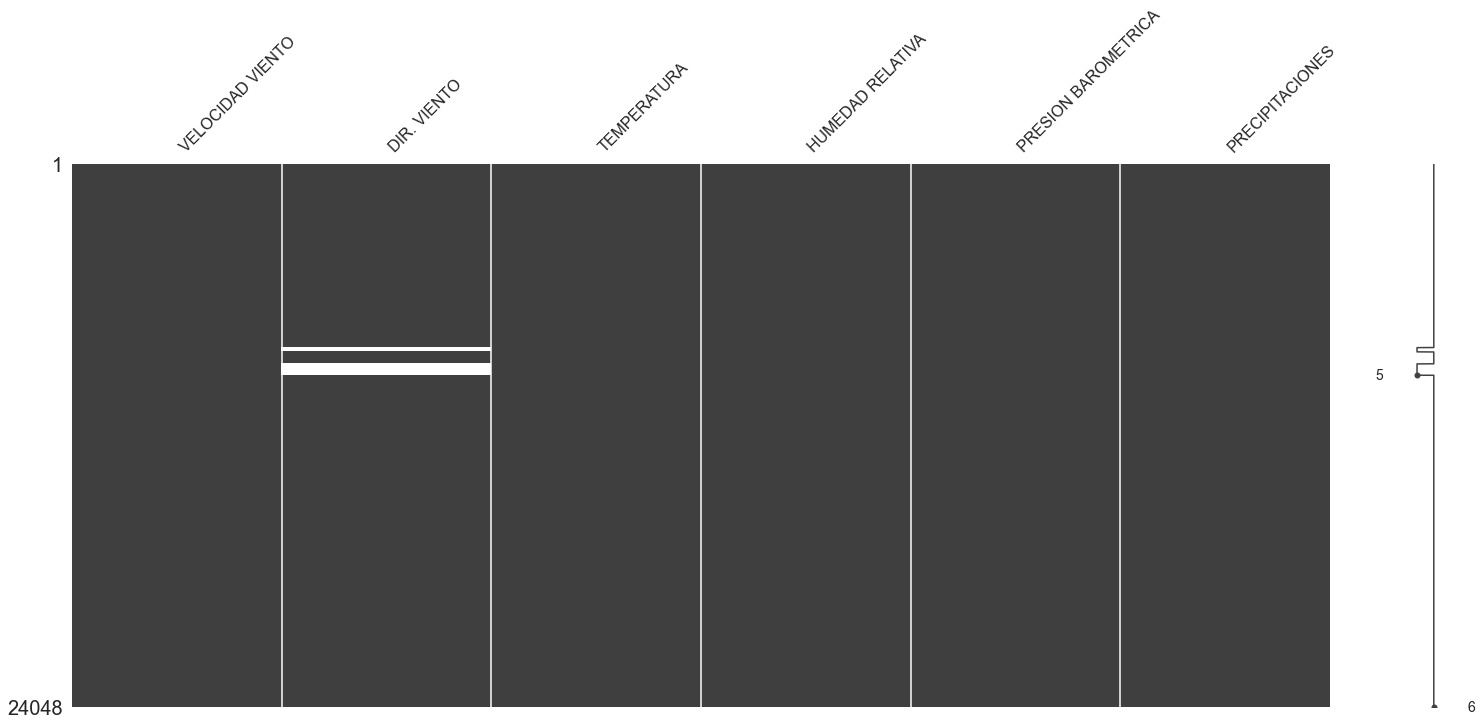

In [14]:
sns.set()
df_contaminantes = df.iloc[:,4:10]
# Visualizar los valores nulos.
msno.matrix(df_contaminantes).autoscale()

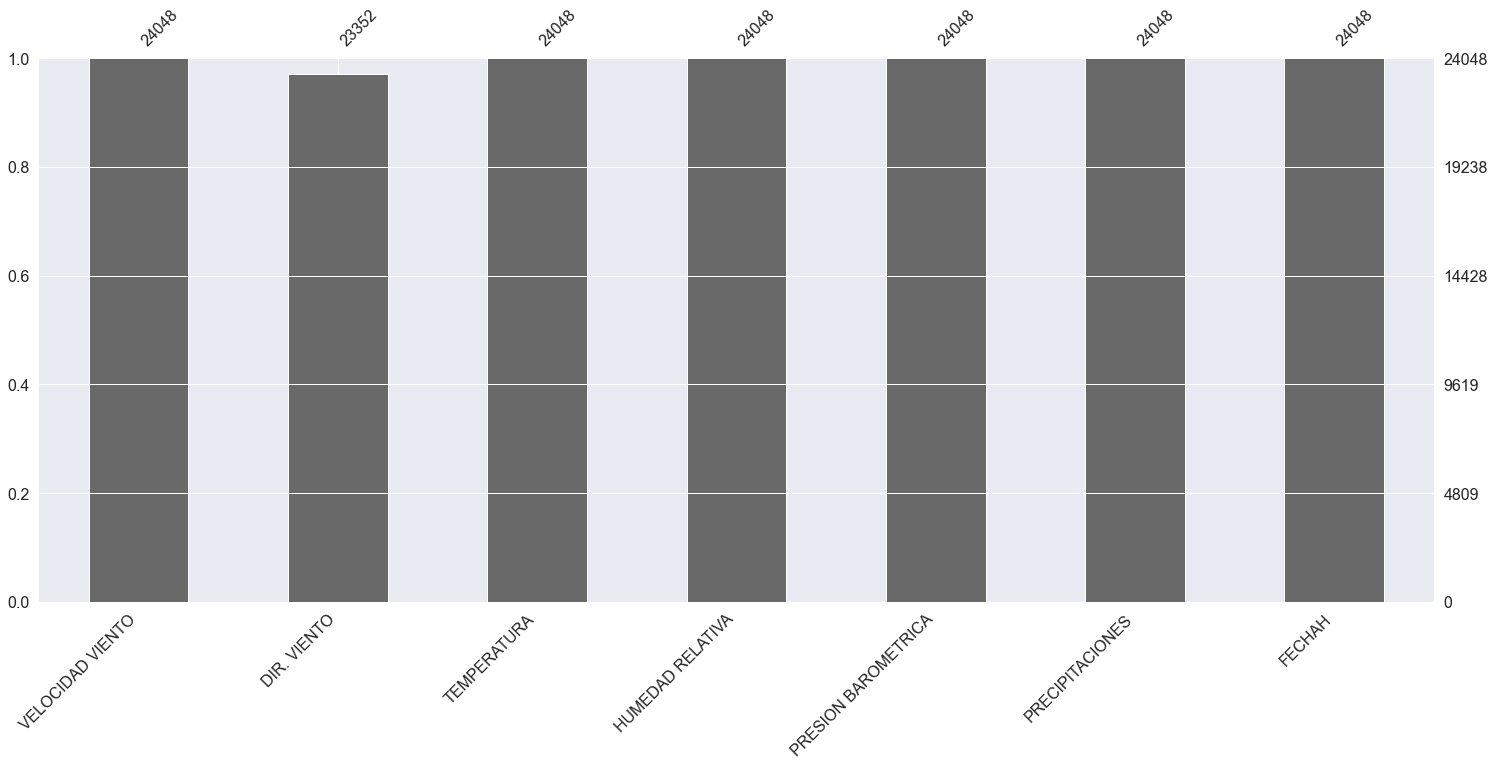

In [15]:
#Seleccionamos todas las filas y de la columna 4 al final
df_small = df.iloc[:,4:11]
df1 = msno.bar(df_small)

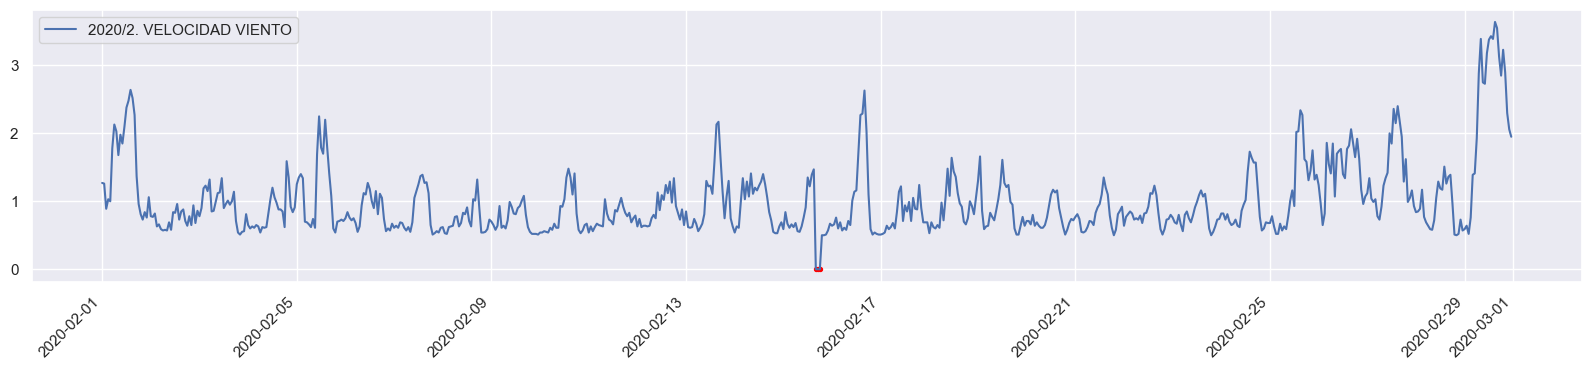

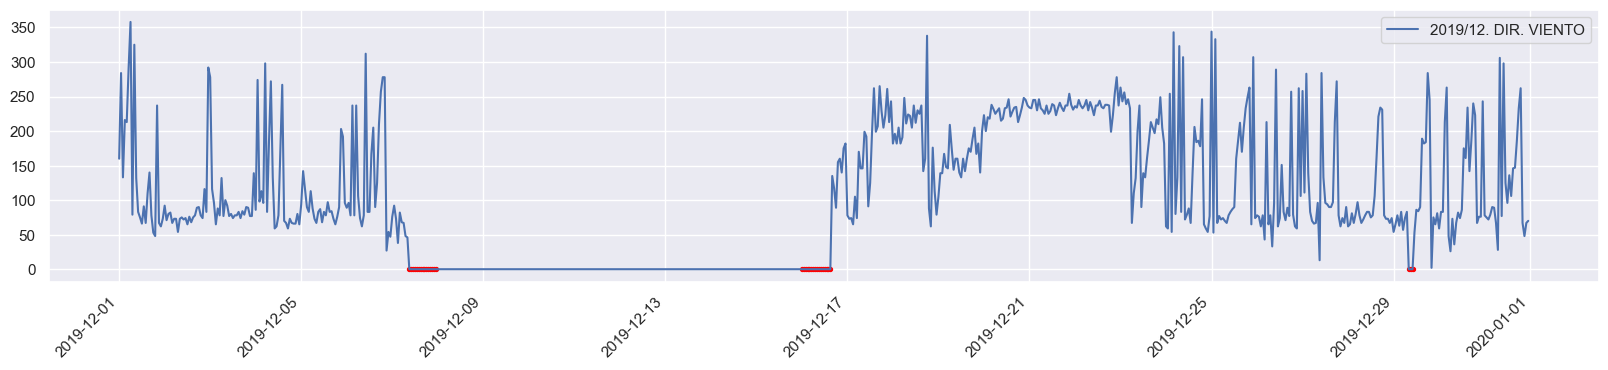

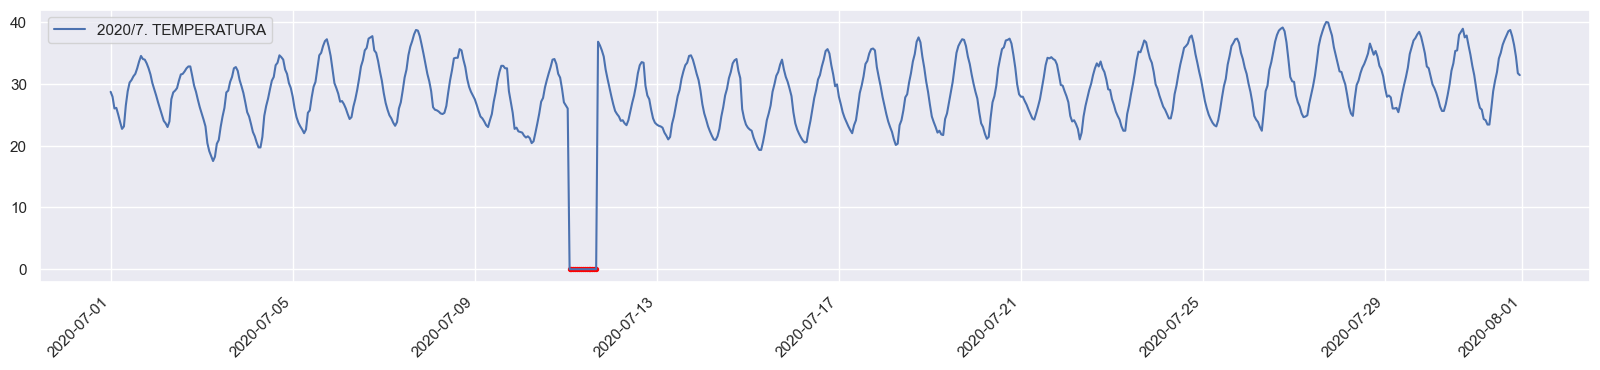

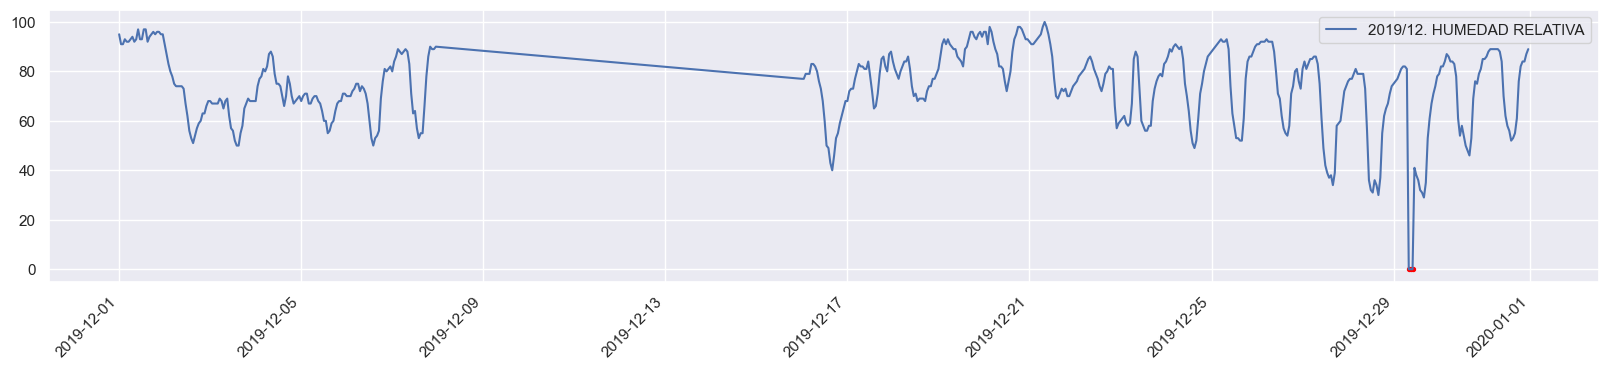

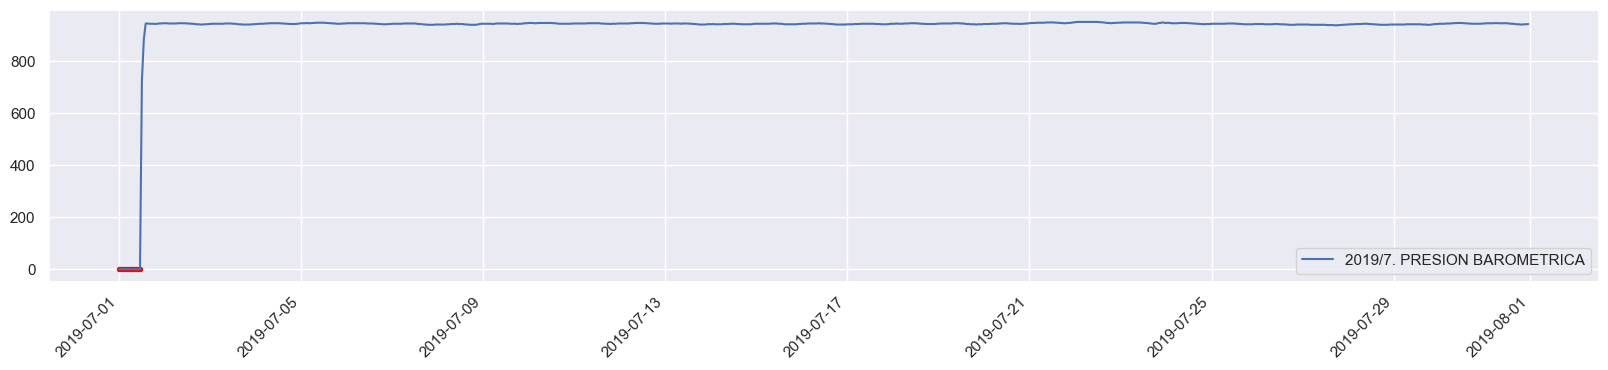

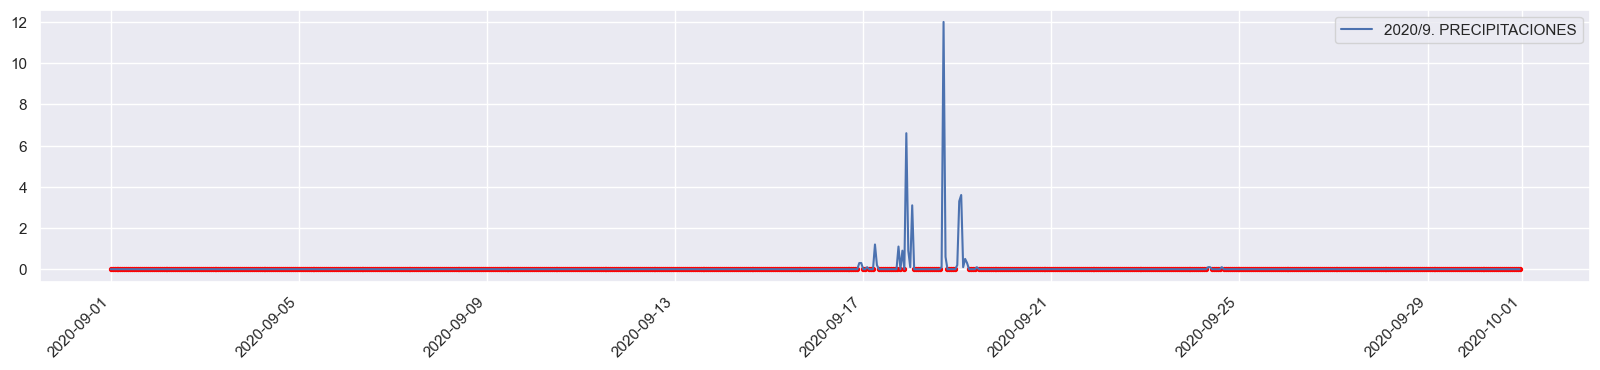

In [16]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import random

dfNoNa = df.dropna()
# muestra el mes al que pertenece la fila
def muestraMes(df,row,c):
    month = row.MES
    year = row.ANO
    dfmes = df[(df.MES==month) & (df.ANO==year)]
    fig, ax = plt.subplots(1,figsize=(20, 4),dpi=100)
    ax.plot(dfmes.FECHAH,dfmes[c],label=str(int(year))+"/"+str(int(month))+". "+c)
    ceros = dfmes[dfmes[c]==0]
    ax.scatter(ceros.FECHAH,ceros[c],color="red",s=8)
    if row[c]!=0: # señalar el día
        ax.scatter(row.FECHAH,row[c],color="green",s=20)
    fig.autofmt_xdate(rotation=45)
    plt.legend()
    plt.show()
    
for c in magnitudes:
    dfc0 = dfNoNa[dfNoNa[c]==0]
    if len(dfc0)>0:
        row =dfc0.iloc[random.randint(0,len(dfc0)-1)] #De todos los valores 0´s 
        muestraMes(dfNoNa,row,c)

In [17]:
# convertir 
import pandas as pd
import numpy as np
magni = ["VELOCIDAD VIENTO","HUMEDAD RELATIVA","PRESION BAROMETRICA"]
for i,c in enumerate(magni):
    df.iloc[(df[c]<=0).values,i] = pd.NA

VELOCIDAD VIENTO


C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


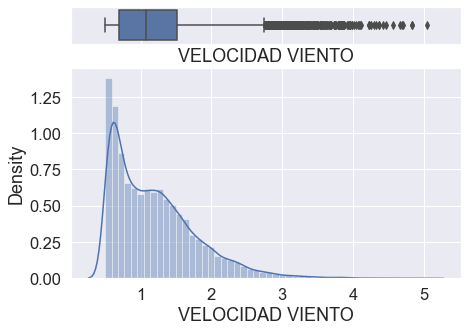

DIR. VIENTO


C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


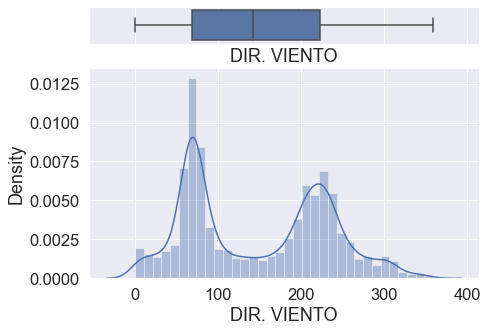

TEMPERATURA


C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


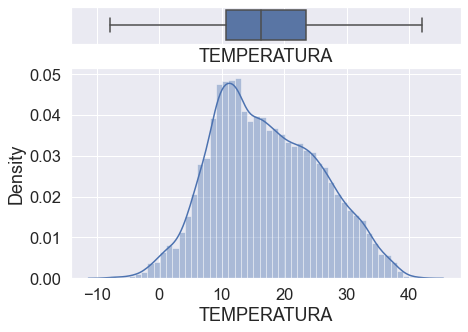

HUMEDAD RELATIVA


C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


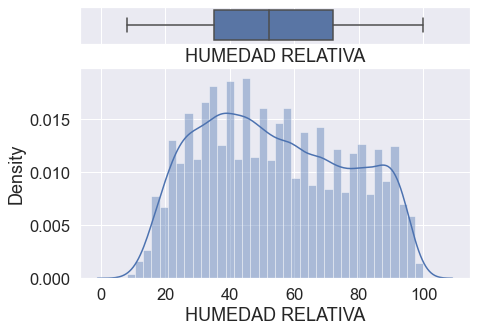

PRESION BAROMETRICA


C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


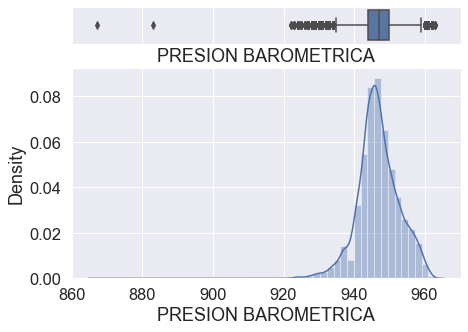

PRECIPITACIONES


C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


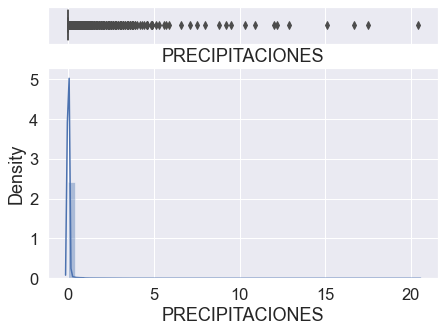

In [18]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def histogram_boxplot(data, xlabel = None, title = None, font_scale=1.5, figsize=(7,5), bins = None):
    """ Boxplot and histogram combined
    data: 1-d data array
    xlabel: xlabel 
    title: title
    font_scale: the scale of the font (default 2)
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)

    example use: histogram_boxplot(np.random.rand(100), bins = 20, title="Fancy plot")
    """

    sns.set(font_scale=font_scale)
    f2, (ax_box2, ax_hist2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=figsize)
    sns.boxplot(data, ax=ax_box2)
    sns.distplot(data, ax=ax_hist2, bins=bins) if bins else sns.distplot(data, ax=ax_hist2)
    if xlabel: ax_hist2.set(xlabel=xlabel)
    if title: ax_box2.set(title=title)
    plt.show()


def histogramas(df):
    dfNoNa = df.dropna()    
    for c in magnitudes:
        print(c)
        histogram_boxplot(dfNoNa[c],c)
        
histogramas(df)

In [19]:
from scipy import stats
# calculamos los máximos por día
df = df.dropna()
#histogramas(df)

In [20]:
magnitudes = ["VELOCIDAD VIENTO","DIR. VIENTO","TEMPERATURA","HUMEDAD RELATIVA","PRESION BAROMETRICA"]
for c in magnitudes:
    print(c)    
    maxdiarios = df.groupby("DIA")[c].max()
    mediana = maxdiarios.median()
    mad = stats.median_abs_deviation(df[c], scale=1)

    #valores cuya distancia a la mediana superan una cantidad de veces el mad.
    #normalmente el valor a utilizar suele ser 3, que obedece a una función normal.

    outliers = (df[c]-mediana)>15*mad
    df_out = df[outliers]
    if len(df_out)>0:
        print("mediana ",mediana,"mad ",mad,len(df_out))        
        row = df_out.iloc[random.randint(0,len(df_out)-1)]
        #print(row)
        muestraMes(df,row,c)
        mediana = maxdiarios.median()
        mad = stats.median_abs_deviation(df[c], scale=1)

        #valores cuya distancia a la mediana superan una cantidad de veces el mad.
        #normalmente el valor a utilizar suele ser 3, que obedece a una función normal.

        outliers = (df[c]-mediana)>3*mad
        df_out = df[outliers]
        if len(df_out)>0:
            print("mediana ",mediana,"mad ",mad,len(df_out))        
            row = df_out.iloc[random.randint(0,len(df_out)-1)]
            #print(row)
            muestraMes(df,row,c)
            #Quitamos el outlayer que esta en df_out.
            df = df[~df.FECHAH.isin(df_out.FECHAH)]

VELOCIDAD VIENTO
DIR. VIENTO
TEMPERATURA
HUMEDAD RELATIVA
PRESION BAROMETRICA


VELOCIDAD VIENTO


C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


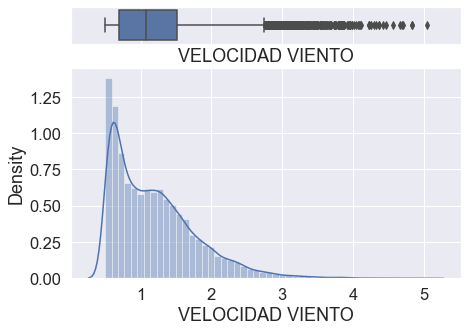

DIR. VIENTO


C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


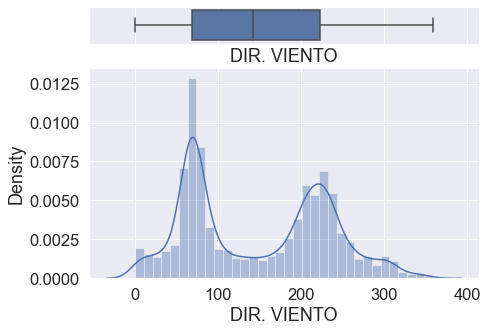

TEMPERATURA


C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


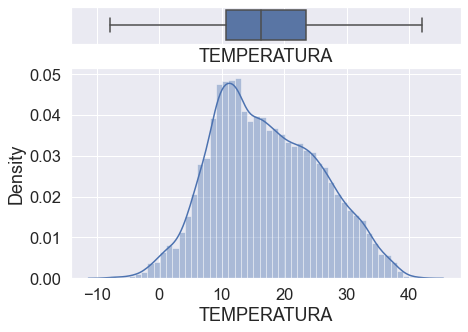

HUMEDAD RELATIVA


C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


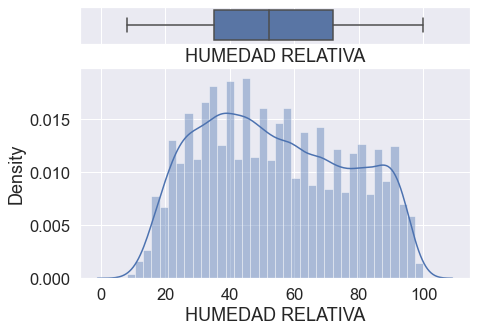

PRESION BAROMETRICA


C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alberto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


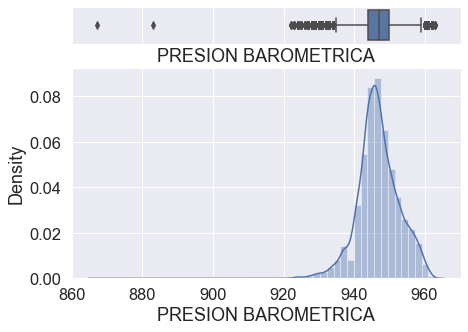

In [21]:
histogramas(df)

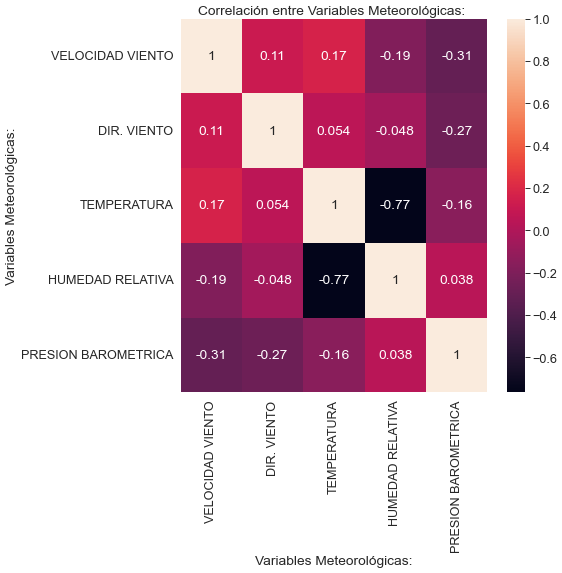

In [22]:
#Seleccionamos todas las filas y de la columna 4 al final
df_small = df.iloc[:,4:9]
correlation_mat = df_small.corr()

figure, ax = plt.subplots(1,figsize=(9, 9),dpi=55)      
sns.heatmap(correlation_mat, annot = True)
plt.xlabel("Variables Meteorológicas:")
plt.ylabel("Variables Meteorológicas:")
plt.title("Correlación entre Variables Meteorológicas: ")
plt.autoscale()

In [23]:
df.to_csv(path+"/DatosLimpiosYOutliers/"+"Meteorologia.csv", header=True, index=False, encoding="utf-8")